# Python Implementation using Linear Regression

# Problem Statement:


The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/ankus/Downloads/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.shape

(4177, 9)

In [4]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
#checking null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

it seems that there are no missisng data in our dataset

# Target Variable

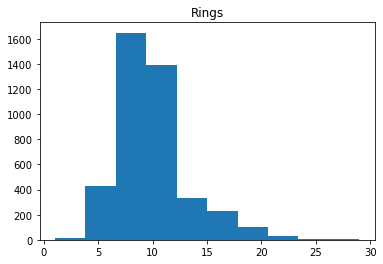

In [6]:
data["Rings"].hist(grid=False)
plt.title("Rings")
plt.show()

In [7]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

# Label Encoding

In [8]:
#Label encoding for sex column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data["Sex"].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

# Checking Correlation

In [9]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


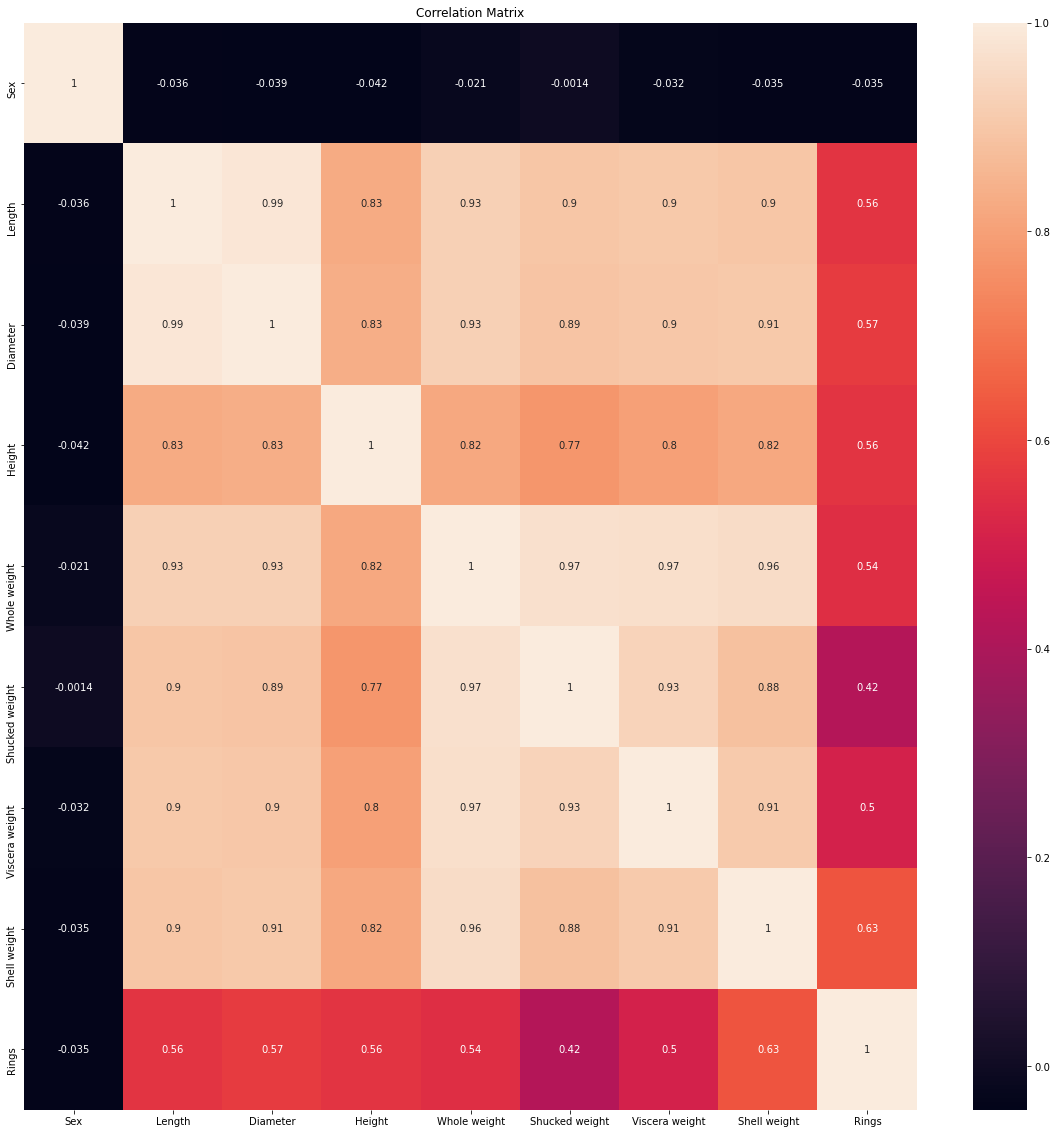

In [10]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=(20,20))
#plot the correlation metrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
corr_matrix=data.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

Above data show the clear correlation of independent variable with target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

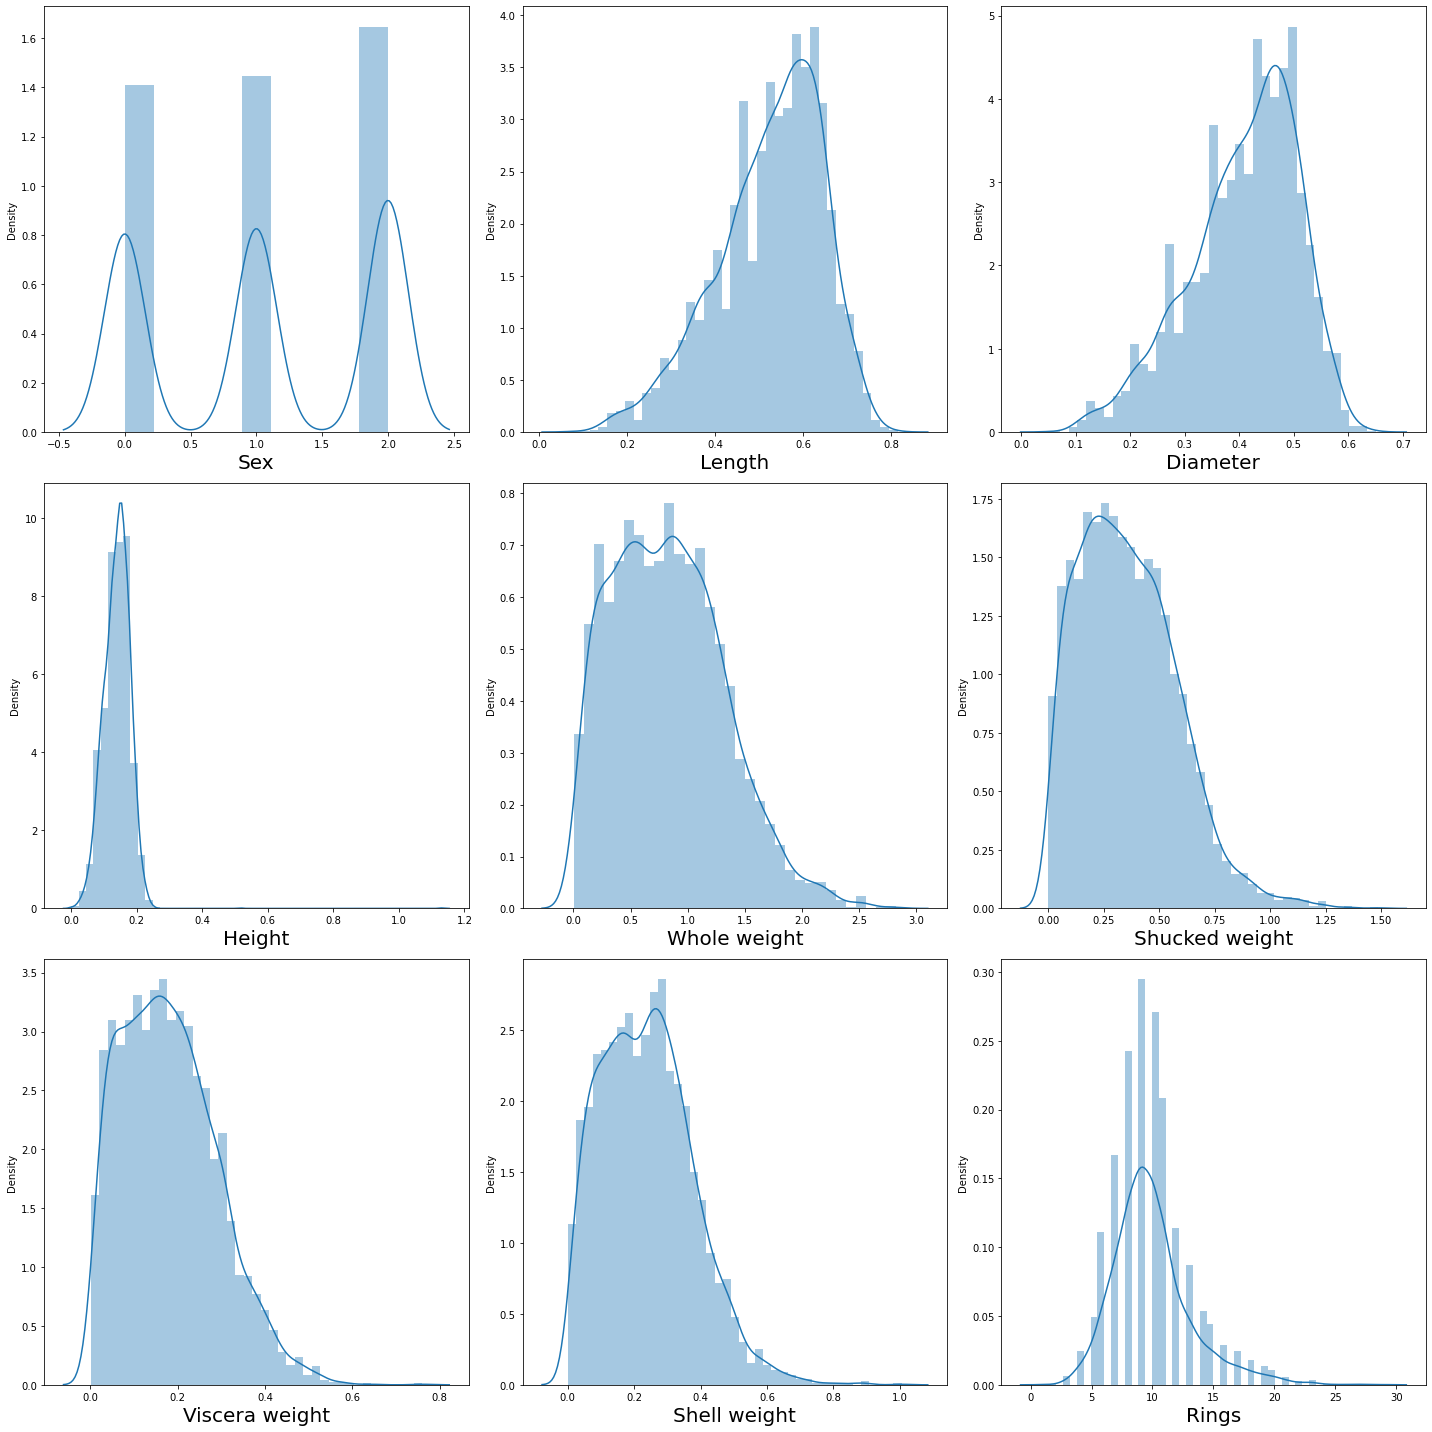

In [12]:
#lets check the data distribution among all the columns
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [13]:
#spliting the independent and target variable into x and y before removing the skewness
x=data.drop("Rings",axis=1)
y=data["Rings"]

In [14]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [15]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [16]:
#checking skewness
x.skew().sort_values()

Length           -0.639873
Diameter         -0.609198
Sex              -0.098155
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Height            3.128817
dtype: float64

we can see skewness in most of the columns(value in range (-0.5-0.5))

In [17]:
#removing skewness
from sklearn.preprocessing import power_transform

In [18]:
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.127072,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,1.127072,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-1.307935,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,1.127072,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-0.009459,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...,...
4172,-1.307935,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,1.127072,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,1.127072,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,-1.307935,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


In [19]:
#validating that skewness has been removed or not
x.skew().sort_values()

Sex              -0.176442
Height           -0.115483
Length           -0.066669
Diameter         -0.065977
Whole weight     -0.003980
Shell weight      0.023390
Shucked weight    0.027351
Viscera weight    0.039780
dtype: float64

skewness has been removed now we proceed with further steps

# Checking Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

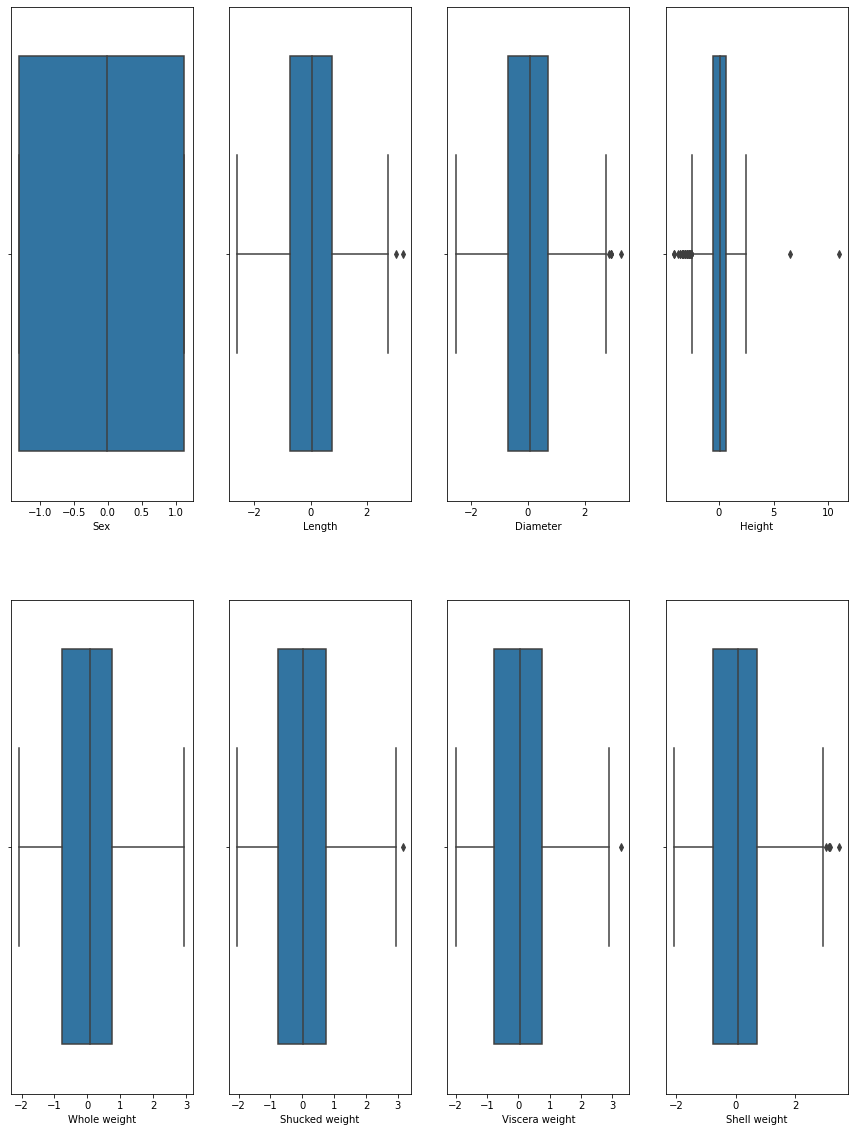

In [20]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1

for column in x:
    if graph<=8:
        ax=plt.subplot(2,4,graph)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

there are only few outliers,so it is okk to proceed

# visualizing relationship

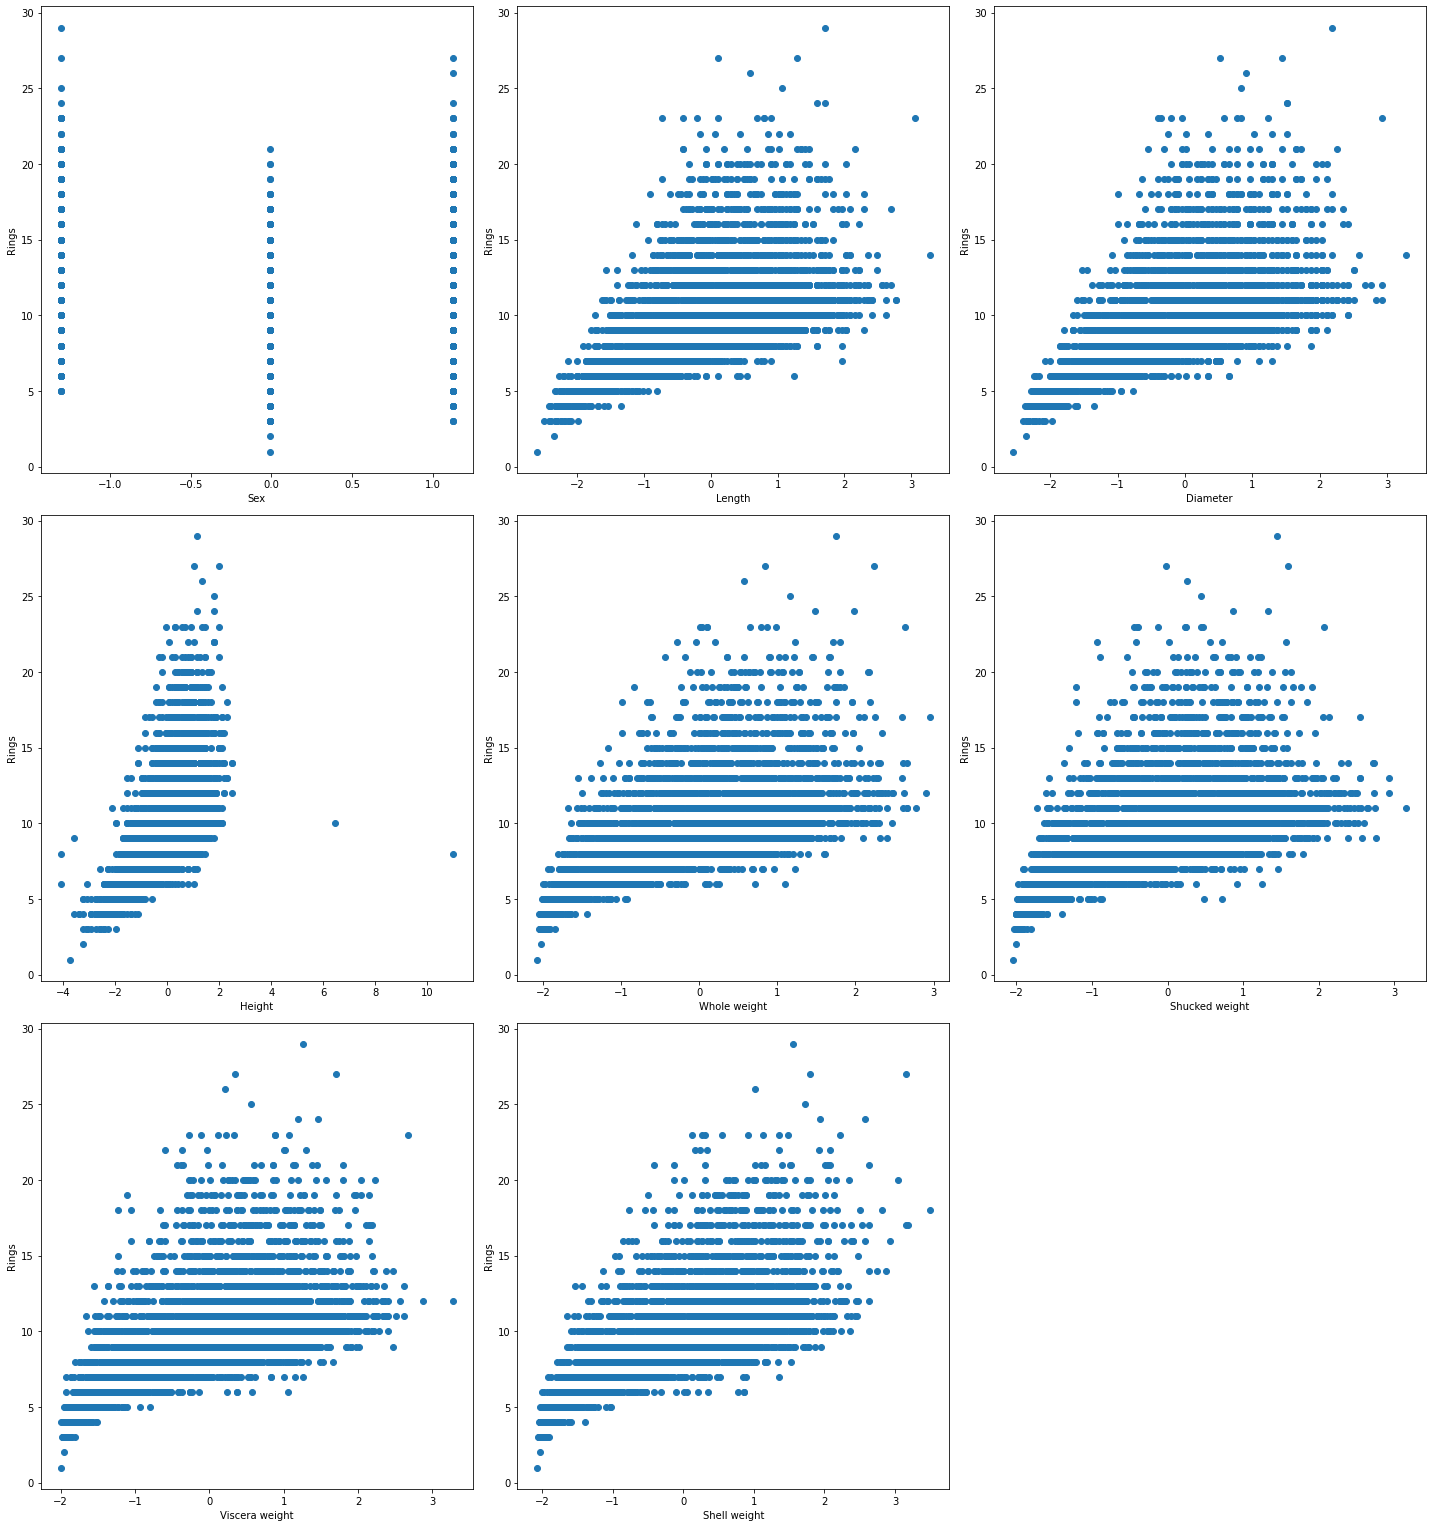

In [21]:
plt.figure(figsize=(20,35))
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel("Rings")
    plotnumber+=1
plt.tight_layout()

data distribution looks decent.....proceed further

# data scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [23]:
x_scaled

array([[ 1.12707158, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 1.12707158, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-1.30793479, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 1.12707158,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [-1.30793479,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.12707158,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

let's go ahead and use linear regression and see how good it fits our data. but first lets split our data in train and test split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [25]:
#finding best random_state
maxAccu=0    #maximum accuracy
maxRS=0    #best random state value

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is :",maxAccu,"on Random_state",maxRS)

best accuracy is : 0.5862628029406824 on Random_state 168


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=168)
y_train.head()

3404     8
1761    12
2768    11
699     16
2405    15
Name: Rings, dtype: int64

# model instantiating and training

In [27]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
#adjusted r2 score
regression.score(x_train,y_train)

0.5317917472513617

lets check how well model fits the data

In [29]:
regression.score(x_test,y_test)

0.5862628029406824

# lets plot and visualize

In [30]:
y_pred=regression.predict(x_test)
y_pred

array([ 9.45883819, 13.3970118 ,  9.38541291, ...,  8.13798768,
       12.70074499,  6.74848593])

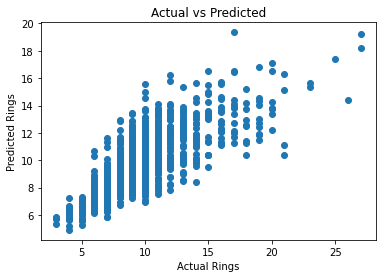

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted')
plt.show()

# model evaluation

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
y_pred=regression.predict(x_test)

In [34]:
mean_absolute_error(y_test,y_pred)

1.5425735455924765

In [35]:
mean_squared_error(y_test,y_pred)

4.467231175555457

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.1135825452429002

# check overfitting

In [37]:
#LASSO Regularization
from sklearn.linear_model import LassoCV, Lasso
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.72546731321927, tolerance: 2.6545538522954084
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.2185458761287, tolerance: 2.6545538522954084
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.94441503971757, tolerance: 2.6545538522954084
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

LassoCV(max_iter=100, normalize=True)

In [38]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

3.640625161995816e-05

In [39]:
#now that we have best parameter,let's use Lasso regression and see how well our data has filter before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.640625161995816e-05)

In [40]:
lasso_reg.score(x_test,y_test)*100

58.62342187415053

In [41]:
#RIDGE REGULARIZATION
#RidgeCV will return best alpha and coefficients after performing 10 cross validation

from sklearn.linear_model import RidgeCV,Ridge
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [42]:
ridgecv.alpha_

0.001

In [43]:
ridge_model=Ridge(alpha=0.001)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [44]:
ridge_model.score(x_test,y_test)*100

58.62617416510201

we got around same r2 square using LASSO and Ridge regression as well .So it is safe to say that there is no overfitting

# Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score


In [50]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Linear Regression model is :",scr.mean())

Cross validation score of Linear Regression model is : 0.4369367914651806
